In [4]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
from config import api_key
temp_units = "imperial"

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy


# Output File (CSV)
output_data_file = "Output/weather_df.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# define url
query_url = f"http://api.openweathermap.org/data/2.5/weather?appid={api_key}&units={temp_units}&q="

# define count of pass throughs
count_one = 0
set_one = 1



In [5]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
# If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

625

In [16]:
# set lists for the dataframe
city_two = []
cloudinesses = []
dates = []
humidities = []
lats = []
lngs = []
max_temps = []
wind_speeds = []
countries = []

# set initial count quantities for organization
count_one = 0
set_one = 1

# loops for creating dataframe columns
for city in cities:
    try:
        response = requests.get(query_url + city.replace(" ","&")).json()
        cloudinesses.append(response['clouds']['all'])
        countries.append(response['sys']['country'])
        dates.append(response['dt'])
        humidities.append(response['main']['humidity'])
        lats.append(response['coord']['lat'])
        lngs.append(response['coord']['lon'])
        max_temps.append(response['main']['temp_max'])
        wind_speeds.append(response['wind']['speed'])
        if count_one > 48:
            count_one = 1
            set_one += 1
            city_two.append(city)
        else:
            count_one += 1
            city_two.append(city)
        print(f"Processing Record {count_one} of Set {set_one} | {city}")
    except Exception:
        print("City not found. Skipping...")
print("------------------------------\nData Retrieval Complete\n------------------------------")

Processing Record 1 of Set 1 | pangnirtung
Processing Record 2 of Set 1 | arraial do cabo
Processing Record 3 of Set 1 | mar del plata
City not found. Skipping...
Processing Record 4 of Set 1 | rikitea
Processing Record 5 of Set 1 | dubrovytsya
Processing Record 6 of Set 1 | shebunino
Processing Record 7 of Set 1 | leh
Processing Record 8 of Set 1 | pevek
Processing Record 9 of Set 1 | manutuke
Processing Record 10 of Set 1 | noormarkku
Processing Record 11 of Set 1 | puerto escondido
Processing Record 12 of Set 1 | tilichiki
Processing Record 13 of Set 1 | nikolskoye
City not found. Skipping...
Processing Record 14 of Set 1 | albany
Processing Record 15 of Set 1 | bambous virieux
Processing Record 16 of Set 1 | barrow
Processing Record 17 of Set 1 | new norfolk
Processing Record 18 of Set 1 | wewak
Processing Record 19 of Set 1 | kodiak
Processing Record 20 of Set 1 | provideniya
Processing Record 21 of Set 1 | cerkezkoy
Processing Record 22 of Set 1 | ushuaia
Processing Record 23 of 

Processing Record 38 of Set 4 | laguna
Processing Record 39 of Set 4 | grand river south east
Processing Record 40 of Set 4 | faanui
Processing Record 41 of Set 4 | nara
Processing Record 42 of Set 4 | kangaatsiaq
Processing Record 43 of Set 4 | jacareacanga
City not found. Skipping...
Processing Record 44 of Set 4 | coihaique
Processing Record 45 of Set 4 | hasaki
Processing Record 46 of Set 4 | darbhanga
Processing Record 47 of Set 4 | brae
City not found. Skipping...
Processing Record 48 of Set 4 | kavaratti
Processing Record 49 of Set 4 | cap malheureux
Processing Record 1 of Set 5 | san quintin
Processing Record 2 of Set 5 | clyde river
Processing Record 3 of Set 5 | bontang
Processing Record 4 of Set 5 | khatanga
City not found. Skipping...
Processing Record 5 of Set 5 | kolvereid
Processing Record 6 of Set 5 | kaitangata
Processing Record 7 of Set 5 | copiapo
Processing Record 8 of Set 5 | asau
Processing Record 9 of Set 5 | lebu
Processing Record 10 of Set 5 | maldonado
Process

Processing Record 28 of Set 8 | nanakuli
Processing Record 29 of Set 8 | saint-georges
Processing Record 30 of Set 8 | katete
Processing Record 31 of Set 8 | mogadishu
Processing Record 32 of Set 8 | sao joao da barra
Processing Record 33 of Set 8 | ylivieska
Processing Record 34 of Set 8 | san pedro de macoris
Processing Record 35 of Set 8 | luderitz
Processing Record 36 of Set 8 | catuday
Processing Record 37 of Set 8 | bonfim
Processing Record 38 of Set 8 | mazagao
Processing Record 39 of Set 8 | high level
Processing Record 40 of Set 8 | donduseni
Processing Record 41 of Set 8 | namibe
Processing Record 42 of Set 8 | siderno
Processing Record 43 of Set 8 | kirovsk
Processing Record 44 of Set 8 | xai-xai
Processing Record 45 of Set 8 | thayetmyo
Processing Record 46 of Set 8 | batagay-alyta
City not found. Skipping...
Processing Record 47 of Set 8 | monywa
Processing Record 48 of Set 8 | fort-shevchenko
Processing Record 49 of Set 8 | galveston
Processing Record 1 of Set 9 | birao
P

KeyboardInterrupt: 

In [17]:
# create a dictionary for establishing dataframe
weather_dict = {
    "City":city_two,
    "Cloudiness":cloudinesses,
    "Country":countries,
    "Date":dates,
    "Humidity":humidities,
    "Lat":lats,
    "Lng":lngs,
    "Max Temp":max_temps,
    "Wind Speed":wind_speeds
}

In [18]:
# establish dataframe
weather_dataframe = pd.DataFrame(weather_dict)

In [19]:
# show the top of the dataframe
weather_dataframe.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,pangnirtung,90,CA,1619715828,86,66.1451,-65.7125,30.20,2.30
1,arraial do cabo,40,BR,1619715553,46,-22.8362,-46.6460,75.99,13.80
2,mar del plata,75,ES,1619715544,76,43.4002,-4.0094,54.00,2.30
3,rikitea,94,PF,1619715829,69,-23.1203,-134.9692,75.74,9.24
4,dubrovytsya,100,UA,1619715617,76,51.5744,26.5650,53.06,5.95


In [24]:
# output data to csv

weather_dataframe.to_csv('weather_df.csv')

In [22]:
weather_dataframe.count()

City          545
Cloudiness    545
Country       545
Date          545
Humidity      545
Lat           545
Lng           545
Max Temp      545
Wind Speed    545
dtype: int64

In [23]:
weather_dataframe.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,pangnirtung,90,CA,1619715828,86,66.1451,-65.7125,30.20,2.30
1,arraial do cabo,40,BR,1619715553,46,-22.8362,-46.6460,75.99,13.80
2,mar del plata,75,ES,1619715544,76,43.4002,-4.0094,54.00,2.30
3,rikitea,94,PF,1619715829,69,-23.1203,-134.9692,75.74,9.24
4,dubrovytsya,100,UA,1619715617,76,51.5744,26.5650,53.06,5.95


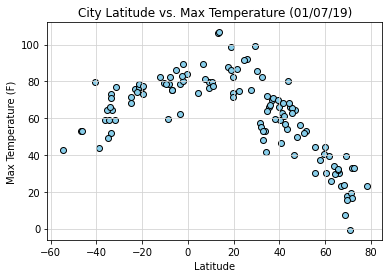

In [13]:
plt.scatter(weather_dataframe["Lat"],weather_dataframe["Max Temp"],edgecolors="black",facecolors="skyblue")
plt.title("City Latitude vs. Max Temperature (01/07/19)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")
plt.show()


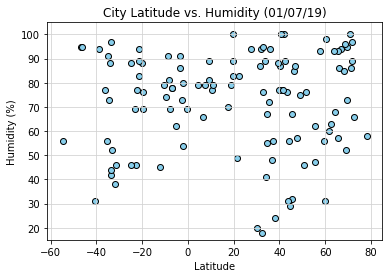

In [14]:
plt.scatter(weather_dataframe["Lat"],weather_dataframe["Humidity"],edgecolors="black",facecolors="skyblue")
plt.title("City Latitude vs. Humidity (01/07/19)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.ylim(15,105)
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")
plt.show()

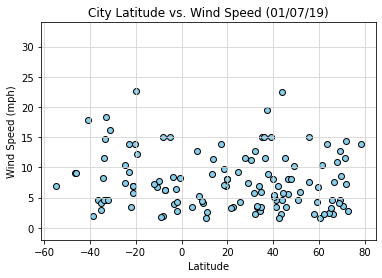

In [15]:
plt.scatter(weather_dataframe["Lat"],weather_dataframe["Wind Speed"],edgecolors="black",facecolors="skyblue")
plt.title("City Latitude vs. Wind Speed (01/07/19)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.ylim(-2,34)
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")
plt.show()